In [1]:
import pandas as pd
import numpy as np

In [2]:
# 편의점 매출자료
df1 = pd.read_csv('C:/Users/0105l/Desktop/고려대학교/대학교/3학년 1학기/통계적머신러닝 PBL/실습/data/rossman_store_sales/train.csv', engine='python')

In [3]:
print(df1.shape)
type(df1)

(1017209, 9)


pandas.core.frame.DataFrame

In [4]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
## 변수 설명
# store : 편의점 고유 번호
# sales : Date 변수에 기록된 날짜의 매출액
# customers : 해당날짜에 편의점을 방문한 고객수
# open : 해당 날짜에 편의점을 열었는지 여부
# promo : promotion 행사가 있었는지 여부
# stateholiday : 공휴일, 부활절, 크리스마스, 나머지 -> 0
# schoolholiday : 학교 휴일 유무

In [6]:
df2 = pd.read_csv('C:/Users/0105l/Desktop/고려대학교/대학교/3학년 1학기/통계적머신러닝 PBL/실습/data/rossman_store_sales/store.csv', engine='python')
df2.shape

(1115, 10)

In [7]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
# 데이터 가로 합치기 (row)
df = pd.merge(df1, df2, on='Store')
df.shape

(1017209, 18)

In [9]:
df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [10]:
# 중복을 제외하고 계산한 개수
print(len(df['Store'].unique()))  #총 편의점 수 : 1,115개
print(len(df['Date'].unique()))   #영업일 : 942개 - 다른날짜
print(df['DayOfWeek'].value_counts())  #요일 : 잘 분포됨 

1115
942
5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64


In [11]:
# datetime : 연, 월, 계절 분류에 사용하는 함수

df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.week
df['Season'] = np.where(df['Month'].isin([3,4,5]), 'Spring',
                       np.where(df['Month'].isin([6,7,8]), 'Summer',
                               np.where(df['Month'].isin([9,10,11]), 'fall',
                                        np.where(df['Month'].isin([12,1,2]),'winter','None'))))
print(df[['Date','Year','Month','Day','Week','Quarter','Season']].head())
                     

        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001493AC88C70>,
      dtype=object)

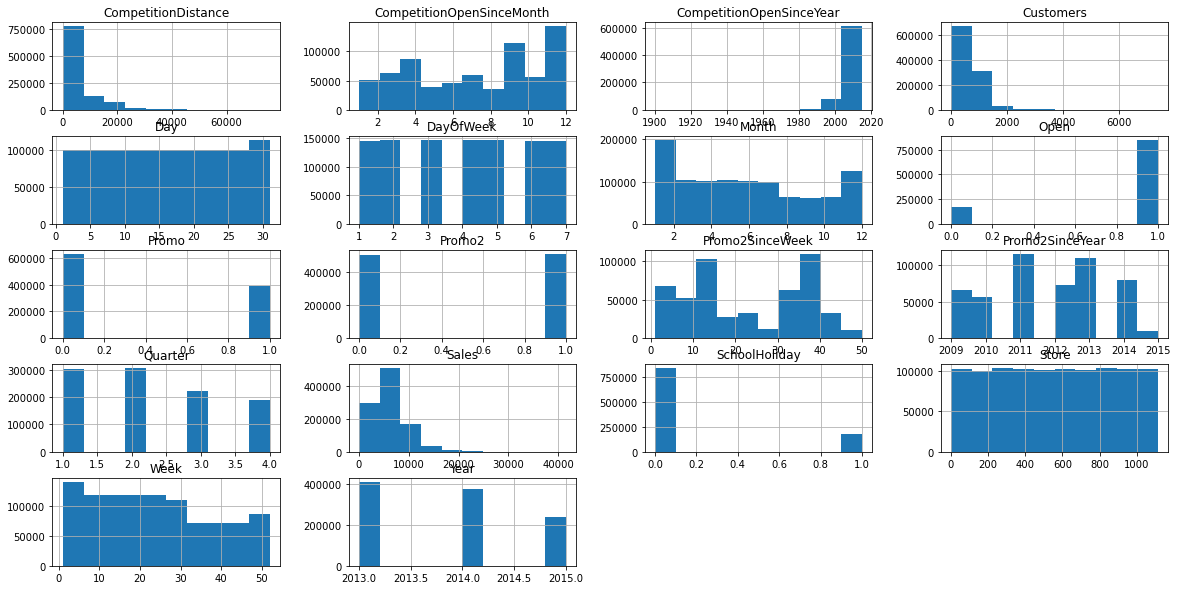

In [12]:
df.hist(figsize=(20,10))

In [13]:
# 결측치 비율 확인

df.isnull().sum() / df.shape[0]*100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [18]:
# CompetitionDistance : 0.26% 결측치 
# mode 값으로 대체 (결측치 비율이 10% 이하일때)
# 제거 (결측치 비율이 30% 이상일때)

df['CompetitionDistance']=df['CompetitionDistance'].fillna(df['CompetitionDistance'].mode())
df['CompetitionDistance'].isnull().sum()

2642

In [20]:
df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week,Season
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,NaN,NaN,NaN,7,3,2015,31,31,Summer
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,0,NaN,NaN,NaN,7,3,2015,30,31,Summer
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,0,NaN,NaN,NaN,7,3,2015,29,31,Summer
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0,NaN,NaN,NaN,7,3,2015,28,31,Summer
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,0,NaN,NaN,NaN,7,3,2015,27,31,Summer


In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 결측치가 많은 자료를 제외한 변수들만 가져오자.
n_columns = ['Customers', 'Open', 'Promo', 'Promo2', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance']

# 범주형 변수들
categ_columns = ['DayOfWeek', 'Quarter', 'Month', 'Year', 'StoreType', 'Assortment', 'Season']

In [25]:
# 범주형 변수를 수치화(label encoder) -> one-hot encoder로 가변수화

def dummy(data, col):
    lab=LabelEncoder()  #범주형 변수를 수치화  (0 ~ c-1)
    aa=lab.fit_transform(data[col]).reshape(-1,1)
    ohe=OneHotEncoder(sparse=False)  
    # OneHotEncoder : LabelEncoder된 자료를 one-hot encoding으로 전환하는 class함수
    
    column_names=[col+'_'+ str(i) for i in lab.classes_]
    return(pd.DataFrame(ohe.fit_transform(aa), columns=column_names))

In [28]:
fdata=df[n_columns]
for column in categ_columns:
    temp_df=dummy(df,column)
    fdata=pd.concat([fdata,temp_df], axis=1)
fdata.head()

,Customers,Open,Promo,Promo2,StateHoliday,SchoolHoliday,CompetitionDistance,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Season_Spring,Season_Summer,Season_fall,Season_winter
0,555,1,1,0,0,1,1270.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,546,1,1,0,0,1,1270.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,523,1,1,0,0,1,1270.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,560,1,1,0,0,1,1270.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,612,1,1,0,0,1,1270.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
fdata.shape

# one-hot vector 결과) 열 18 -> 44로 증가

(1017209, 44)

In [32]:
fdata.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [34]:
fdata['StateHoliday'].unique()

# '0' : 휴일이 아닌 날 / 'a' : 공휴일 / 'b' : 부활절 / 'c' : 크리스마스
# StateHoliday 변수는 one-hot encoding으로 처리해야 하지만, 휴일과 휴일이 아닌 이항변수로 분류하더라도 큰 영향 X
# 휴일이 아니면 : 0 / 휴일 : 1 (이항변수)

array(['0', 'a', 'b', 'c'], dtype=object)

In [35]:
fdata['StateHoliday']=np.where(fdata['StateHoliday']=='o', 0, 1)